Libraries import

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_path = "/kaggle/input/portfoloi-1/household_power_consumption.txt"


In [11]:

df1 = pd.read_csv(file_path, sep = ';',
                 parse_dates = {'datetime': ['Date', 'Time']},
                 na_values = '?', 
                 low_memory = False
                )



/tmp/ipykernel_55/2902787816.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df1 = pd.read_csv(file_path, sep = ';',
/tmp/ipykernel_55/2902787816.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1 = pd.read_csv(file_path, sep = ';',


In [12]:
df = df1

In [13]:
df = df.rename(columns={
    'Sub_metering_1': 'energy_kitchen_wh',
    'Sub_metering_2': 'energy_laundry_wh',
    'Sub_metering_3': 'energy_climate_wh'
})

df.set_index('datetime', inplace=True)
df_hourly = df['Global_active_power'].resample('H').mean()




/tmp/ipykernel_55/4205728911.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df['Global_active_power'].resample('H').mean()


In [14]:
df_hourly

datetime
2006-12-16 17:00:00    4.222889
2006-12-16 18:00:00    3.632200
2006-12-16 19:00:00    3.400233
2006-12-16 20:00:00    3.268567
2006-12-16 21:00:00    3.056467
                         ...   
2010-11-26 17:00:00    1.725900
2010-11-26 18:00:00    1.573467
2010-11-26 19:00:00    1.659333
2010-11-26 20:00:00    1.163700
2010-11-26 21:00:00    0.934667
Freq: h, Name: Global_active_power, Length: 34589, dtype: float64

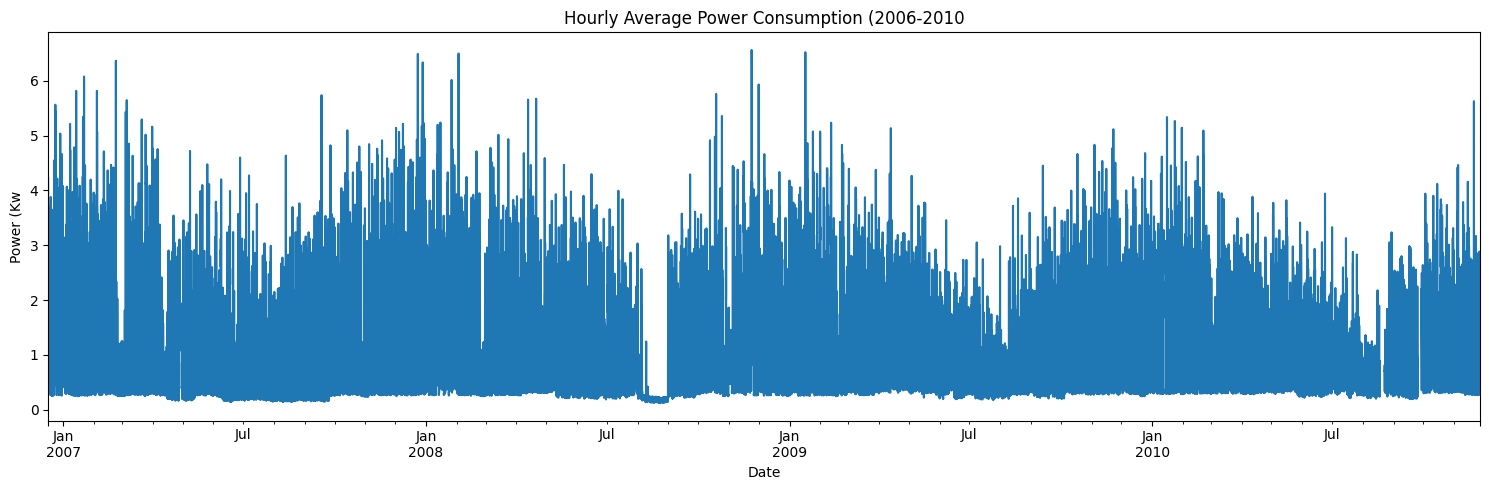

In [15]:
plt.figure(figsize = (15,5))
df_hourly.plot()
plt.title('Hourly Average Power Consumption (2006-2010')
plt.xlabel('Date')
plt.ylabel('Power (Kw')
plt.tight_layout()
plt.show()

Full Time Series (2006-2010)
- Clear seasonal patterns: higher consumption in winter months
- Significant drop in consumption after 2009
- Regular periodic spikes suggest weekly/monthly patterns

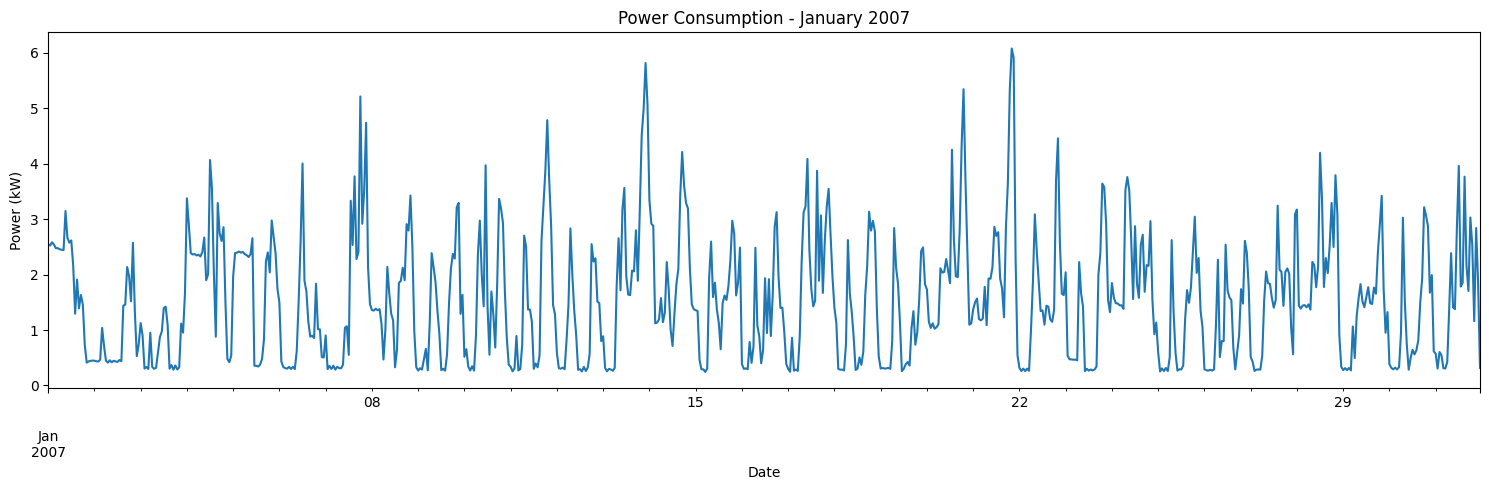

In [16]:
plt.figure(figsize=(15,5))
df_hourly['2007-01'].plot()
plt.title('Power Consumption - January 2007')
plt.xlabel('Date')
plt.ylabel('Power (kW)')
plt.tight_layout()
plt.show()

January 2007 Closeup
- Strong daily periodicity - consumption follows human activity
- Clear difference between weekday and weekend patterns(7,14,21,28)
- Morning and evening peaks align with residential activity
- Nighttime consumption drops to minimum

In [17]:
df_hourly

datetime
2006-12-16 17:00:00    4.222889
2006-12-16 18:00:00    3.632200
2006-12-16 19:00:00    3.400233
2006-12-16 20:00:00    3.268567
2006-12-16 21:00:00    3.056467
                         ...   
2010-11-26 17:00:00    1.725900
2010-11-26 18:00:00    1.573467
2010-11-26 19:00:00    1.659333
2010-11-26 20:00:00    1.163700
2010-11-26 21:00:00    0.934667
Freq: h, Name: Global_active_power, Length: 34589, dtype: float64

In [18]:
df_hourly_df = df_hourly.to_frame()
df_hourly_df['hour'] = df_hourly_df.index.hour
df_hourly_df

,Global_active_power,hour
datetime,,
2006-12-16 17:00:00,4.222889,17
2006-12-16 18:00:00,3.632200,18
2006-12-16 19:00:00,3.400233,19
2006-12-16 20:00:00,3.268567,20
2006-12-16 21:00:00,3.056467,21
...,...,...
2010-11-26 17:00:00,1.725900,17
2010-11-26 18:00:00,1.573467,18
2010-11-26 19:00:00,1.659333,19


In [19]:
hourly_avg = df_hourly_df.groupby('hour')['Global_active_power'].mean()
hourly_avg

hour
0     0.659562
1     0.539325
2     0.480618
3     0.444850
4     0.443844
5     0.453674
6     0.791606
7     1.502373
8     1.460940
9     1.331642
10    1.260913
11    1.246408
12    1.207061
13    1.144471
14    1.082750
15    0.990806
16    0.948805
17    1.056164
18    1.326433
19    1.733428
20    1.899073
21    1.876063
22    1.412681
23    0.902142
Name: Global_active_power, dtype: float64

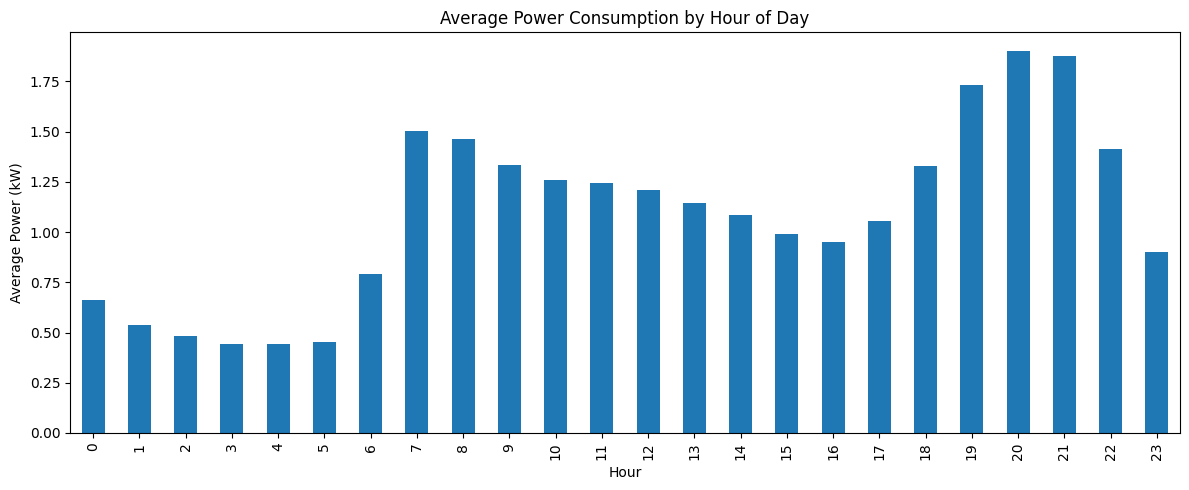

In [20]:
plt.figure(figsize=(12,5))
hourly_avg.plot(kind='bar')
plt.title('Average Power Consumption by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Power (kW)')
plt.tight_layout()
plt.savefig('hourly_pattern.png')
plt.show()

Hourly Consumption Pattern
- Peak hours: 7-9 AM and 6-9 PM (breakfast/dinner times)
- Lowest consumption: 2-5 AM (sleeping hours)
- Average consumption: ~1.2 kW during peak, ~0.45 kW at night
- Pattern confirms residential household behavior

In [21]:
print(f"Missing values: {df_hourly.isnull().sum()}")
print(f"Percentage: {(df_hourly.isnull().sum() / len(df_hourly)) * 100:.2f}%")

Missing values: 421
Percentage: 1.22%


2007-04-28    23
2007-04-29    24
2007-04-30    14
2007-07-15     1
2009-06-13    23
2009-06-14    24
2009-06-15     7
2009-08-13    14
2010-01-12     9
2010-01-13    24
2010-01-14    19
2010-03-20    20
2010-03-21    13
2010-08-17     2
2010-08-18    24
2010-08-19    24
2010-08-20    24
2010-08-21    24
2010-08-22    21
2010-09-25    20
2010-09-26    24
2010-09-27    24
2010-09-28    19
Name: Global_active_power, dtype: int64


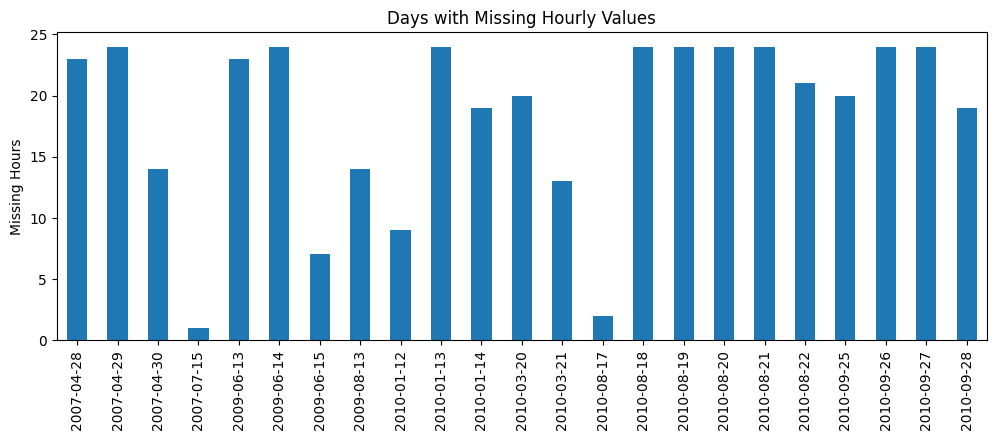

In [32]:
missing_daily = (
    df_hourly_df['Global_active_power']
    .isna()
    .groupby(df_hourly_df.index.date)
    .sum()
)
print(missing_daily[missing_daily > 0])
missing_daily[missing_daily > 0]
missing_daily[missing_daily > 0].plot(kind='bar', figsize=(12,4))
plt.title('Days with Missing Hourly Values')
plt.ylabel('Missing Hours')
plt.show()


## Missing Value Analysis
- Total missing hourly values: 421 (~1.22%)
- Days with missing values: 23
- Missing pattern: Isolated day-level outages rather than continuous gaps
- Worst days: 2007-04-29, 2009-06-14, 2010-01-13, 2010-08-18 to 2010-08-21 (24 missing hours)
- Strategy: Drop fully missing days and apply limited interpolation for small gaps